In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import math
from PIL import Image

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import cv2

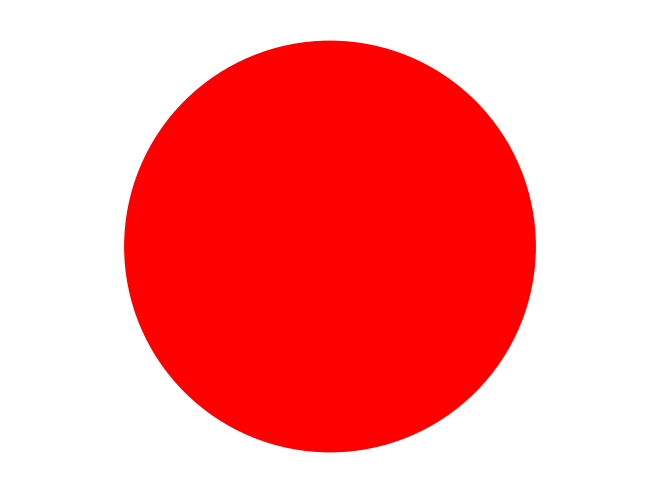

In [6]:
fig = plt.figure(figsize=(4,3),dpi=200)
ax = fig.add_subplot()
c = Circle(xy=(0,0),radius=0.5,facecolor = [1,0,0])
ax.add_patch(c)
plt.axis("equal")
plt.axis("off")
plt.savefig('./roitiqu.png')

(-0.5, 799.5, 599.5, -0.5)

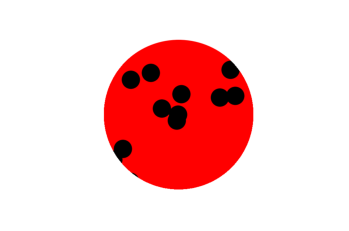

In [9]:
img2=cv2.imread("./roitiqu.png") #logo图像
#img1=cv2.imread("./test4.jpg") #要添加logo的图像
img1=cv2.imread("./tesr.png") 

rows,cols,channels=img2.shape
roi = img1[0:rows,0:cols]
plt.axis("equal")
plt.imshow(img2[...,::-1])
plt.imshow(roi[...,::-1])
#颜色空间转换，这里是BGR转到灰度空间，常用的还有BGR到HSV空间：cv2.COLOR_BGR2HSV
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2gray,cmap='gray')
ret,mask = cv2.threshold(img2gray,175,255,cv2.THRESH_BINARY)
plt.imshow(mask,cmap='gray')
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv,cmap='gray')
img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
plt.imshow(img1_bg[...,::-1])
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
plt.imshow(img2_fg[...,::-1])
dst = cv2.add(img1_bg,img2_fg)
plt.imshow(dst[...,::-1])
img1[0:rows,0:cols] = dst
plt.imshow(img1[...,::-1])
plt.axis("off")